## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

**Load the Boston Housing DataSet from scikit-learn**

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets

**Boston_dataset is a dictionary. let's check what it contains**


In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Load the data into pandas dataframe**

In [7]:
df = pd.DataFrame(boston_dataset['data'], columns = boston_dataset['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The target values is missing from the data. Create a new column of target values and add it to dataframe in a column called MEDV**

In [8]:
df['MEDV'] = boston_dataset['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Data preprocessing**

Check for missing values in all the columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Visualization**

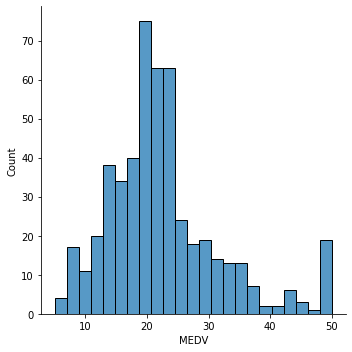

In [12]:
sns.displot(df['MEDV']);

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap

* From correlation plot: which are the columns that are more correlated with **MEDV**
* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity

In [13]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [16]:
import matplotlib.pyplot as plt

<AxesSubplot:>

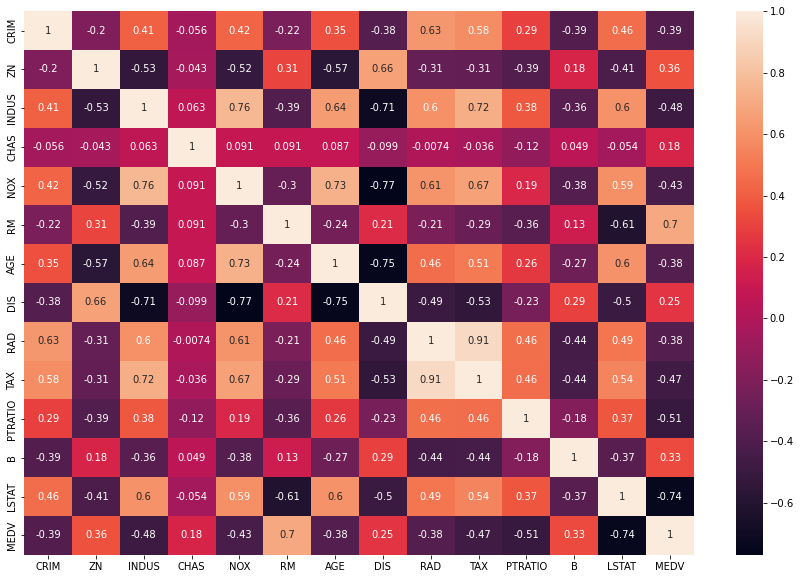

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [21]:
df.drop(columns=['TAX'], inplace=True)

### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

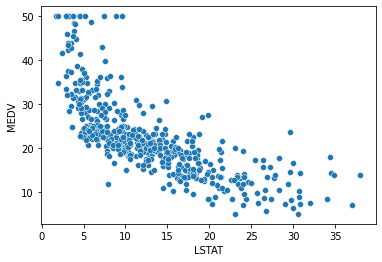

In [24]:
sns.scatterplot(df['LSTAT'], df['MEDV'])

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


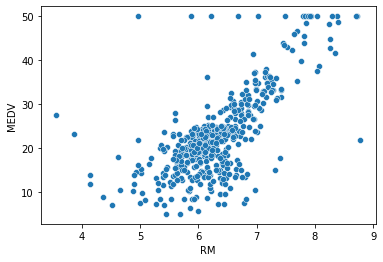

In [25]:
sns.scatterplot(df['RM'], df['MEDV']);

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [26]:
X = df[['LSTAT','RM']]
y = df['MEDV']

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**Evaluate the model performance in the training and testing sets**

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print('MAE train', mean_absolute_error(y_train, lin_reg.predict(X_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, lin_reg.predict(X_train)))
print('MSE train', mean_squared_error(y_train, lin_reg.predict(X_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train))))
print('R2 score train', r2_score(y_train, lin_reg.predict(X_train)))

MAE train 3.911260637542155
MAPE train 0.2059302411747417
MSE train 28.79027648205344
RMSE train 5.365657134224422
R2 score train 0.6618625964841894


In [34]:
print('MAE test', mean_absolute_error(y_test, lin_reg.predict(X_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, lin_reg.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lin_reg.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test))))
print('R2 score test', r2_score(y_test, lin_reg.predict(X_test)))

MAE test 4.1424446562385615
MAPE test 0.21654045363343552
MSE test 37.38310563877995
RMSE test 6.114172522817781
R2 score test 0.5409084827186417


**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MEDV'>

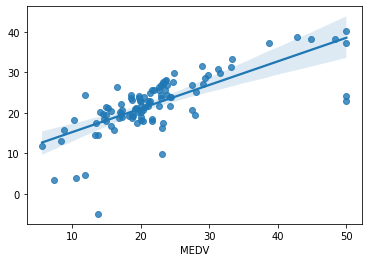

In [35]:
y_pred = lin_reg.predict(X_test)
sns.regplot(y_test, y_pred)

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_poly_train = poly_reg.transform(X_train) 

pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

LinearRegression()

**Did the model improve using the Polynomial model?**

In [38]:
print('MAE train', mean_absolute_error(y_train, pol_reg.predict(X_poly_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, pol_reg.predict(X_poly_train)))
print('MSE train', mean_squared_error(y_train, pol_reg.predict(X_poly_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pol_reg.predict(X_poly_train))))
print('R2 score train', r2_score(y_train, pol_reg.predict(X_poly_train)))

MAE train 3.0801913022545353
MAPE train 0.16019631412193028
MSE train 18.659453833139377
RMSE train 4.319658995006362
R2 score train 0.7808475624020519


In [39]:
X_poly_test = poly_reg.transform(X_test)

In [40]:
print('MAE test', mean_absolute_error(y_test, pol_reg.predict(X_poly_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, pol_reg.predict(X_poly_test)))
print('MSE test', mean_squared_error(y_test, pol_reg.predict(X_poly_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_poly_test))))
print('R2 score test', r2_score(y_test, pol_reg.predict(X_poly_test)))

MAE test 3.3415182491807642
MAPE test 0.17075318728939154
MSE test 28.144971863123658
RMSE test 5.305183490052315
R2 score test 0.6543594328054261


In [43]:
poly_reg_3 = PolynomialFeatures(degree=3)
poly_reg_3.fit(X_train)
X_poly_train = poly_reg_3.transform(X_train) 

pol_reg_3 = LinearRegression()
pol_reg_3.fit(X_poly_train, y_train)

print('MAE train', mean_absolute_error(y_train, pol_reg_3.predict(X_poly_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, pol_reg_3.predict(X_poly_train)))
print('MSE train', mean_squared_error(y_train, pol_reg_3.predict(X_poly_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pol_reg_3.predict(X_poly_train))))
print('R2 score train', r2_score(y_train, pol_reg_3.predict(X_poly_train)))


print('-'*20)
X_poly_test = poly_reg_3.transform(X_test)

print('MAE test', mean_absolute_error(y_test, pol_reg_3.predict(X_poly_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, pol_reg_3.predict(X_poly_test)))
print('MSE test', mean_squared_error(y_test, pol_reg_3.predict(X_poly_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, pol_reg_3.predict(X_poly_test))))
print('R2 score test', r2_score(y_test, pol_reg_3.predict(X_poly_test)))

MAE train 2.929767588994969
MAPE train 0.15341985229170402
MSE train 17.07775402237083
RMSE train 4.132523928832213
R2 score train 0.7994243852918257
--------------------
MAE test 3.265379012271103
MAPE test 0.16650047452330782
MSE test 28.567166435317944
RMSE test 5.34482613705235
R2 score test 0.6491745787537189


In [44]:
poly_reg_4 = PolynomialFeatures(degree=4)
poly_reg_4.fit(X_train)
X_poly_train = poly_reg_4.transform(X_train) 

pol_reg_4 = LinearRegression()
pol_reg_4.fit(X_poly_train, y_train)

print('MAE train', mean_absolute_error(y_train, pol_reg_4.predict(X_poly_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, pol_reg_4.predict(X_poly_train)))
print('MSE train', mean_squared_error(y_train, pol_reg_4.predict(X_poly_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pol_reg_4.predict(X_poly_train))))
print('R2 score train', r2_score(y_train, pol_reg_4.predict(X_poly_train)))


print('-'*20)
X_poly_test = poly_reg_4.transform(X_test)

print('MAE test', mean_absolute_error(y_test, pol_reg_4.predict(X_poly_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, pol_reg_4.predict(X_poly_test)))
print('MSE test', mean_squared_error(y_test, pol_reg_4.predict(X_poly_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, pol_reg_4.predict(X_poly_test))))
print('R2 score test', r2_score(y_test, pol_reg_4.predict(X_poly_test)))

MAE train 2.7549124102947813
MAPE train 0.14812209227876352
MSE train 14.188503706315476
RMSE train 3.7667630276293567
R2 score train 0.8333581893171947
--------------------
MAE test 3.640312319030301
MAPE test 0.18445422758199473
MSE test 33.9992333723552
RMSE test 5.830886156696527
R2 score test 0.5824648763497715


In [46]:
X_all_polly = poly_reg_3.transform(X)

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LSTAT'>

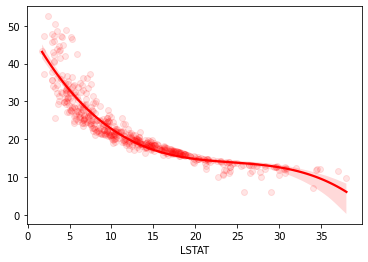

In [49]:

sns.regplot(X['LSTAT'], pol_reg_3.predict(X_all_polly), color='red', order=3, scatter_kws={"alpha":0.1})

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RM'>

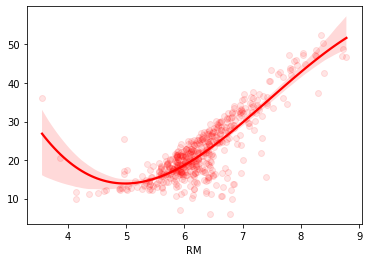

In [50]:

sns.regplot(X['RM'], pol_reg_3.predict(X_all_polly), color='red', order=3, scatter_kws={"alpha":0.1})